<a href="https://colab.research.google.com/github/DtCarrot/deep-learning-flowers/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
tf.enable_eager_execution()
tf.__version__

'1.13.1'

In [2]:
import pathlib
data_root = tf.keras.utils.get_file('flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz', untar=True)
data_root = pathlib.Path(data_root)
print(data_root)

/root/.keras/datasets/flower_photos


In [3]:
for item in data_root.iterdir():
  print(item)

/root/.keras/datasets/flower_photos/roses
/root/.keras/datasets/flower_photos/tulips
/root/.keras/datasets/flower_photos/LICENSE.txt
/root/.keras/datasets/flower_photos/daisy
/root/.keras/datasets/flower_photos/dandelion
/root/.keras/datasets/flower_photos/sunflowers


In [0]:
import random

In [0]:
all_image_paths = list(data_root.glob('*/*'))

In [0]:
all_image_paths = [str(path) for path in all_image_paths]

In [0]:
random.shuffle(all_image_paths)

In [0]:
label_names = sorted(dir_name.name for dir_name in data_root.glob('*/') if dir_name.is_dir())

In [9]:
print(label_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [10]:
label_to_index = dict((name, index) for index, name in enumerate(label_names))
label_to_index

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [11]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name] for path in all_image_paths]
all_image_labels[0:5]

[4, 3, 2, 4, 3]

In [0]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

In [0]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [192, 192])
  image /= 255.0
  return image

In [0]:
def load_and_preprocess_image(path):
  image = tf.read_file(path)
  return preprocess_image(image)

In [0]:
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=5)

NameError: ignored

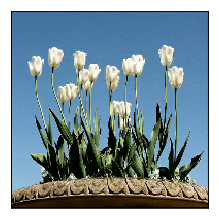

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for n,image in enumerate(image_ds.take(4)):
  plt.subplot(2,2,n+1)
  plt.imshow(image)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(caption_image(all_image_paths[n]))